


---
# Python 人工智能入门 毕业项目

# 利用机器学习模型预测股票走势

## 杨天宇

## 2019年8月5日
---


## 目录
<ul>
<li><a href="#definition">定义</a></li>
<li><a href="#analysis">分析</a></li>
<li><a href="#implementation">实现</a></li>
<li><a href="#result">结果</a></li>
<li><a href="#conclusion">结论</a></li>   
</ul>



---
<a id="definition"></a>
## Ⅰ.定义
 

### 1.项目概况
    股市一直是个很热门的话题，当我们买入的股票涨了，我们就赚钱了。股票价格的涨跌，长期来说是由上市公司为股东创造的利润决定的，而短期是由供求关系决定的，而影响供求关系的因素则包括人们对该公司的盈利预期、大户的人为炒作、市场资金的多少、政策性因素等，这些因素都是不确定的。那我们是否可以通过海量历史数据来预测涨跌呢？仅仅通过人来分析判断是很难的，不过机器可以做到，我们可以用机器代替人脑进行数据挖掘与分析，找出股价变化的潜在规律，进行科学理性的投资。
 
    本项目准备通过前一天股市的交易数据来预测后一天的收盘价格，我选取了2016年3月1日到2015年3月1日共2187个交易日的数据，包括收盘指数，当日最大指数，当日最小指数，交易量，涨跌价格和涨跌幅度。



### 2.问题陈述

    本项目准备通过前一天股市的交易数据来预测后一天的收盘价格。因为收盘价格可能受前一天的收盘指数，最大指数，最小指数等多个变量影响，所以采用多元线性回归模型来预测收盘价格，定义因变量y为当日收盘价格，定义多个自变量X分别为前一天的收盘价格、前一天的最大指数，前一天的最小指数，前一天的交易量，前一天的涨跌价格，前一天的涨跌幅度。


### 3.评价指标

    本项目通过决定系数（R-Squared）来判断模型的拟合度，决定系数是回归平方和占总平方和的比例，决定系数越接近 1，模型就越拟合数据。还有均方误差（MSE），即用（真实值-预测值）然后平方之后求和平均，其值越小，模型越精确。


---
<a id="analysis"></a>
## Ⅱ.分析

### 1.数据的探索
    本项目采用的数据集是2016年3月1日到2015年3月1日共2187个交易日的数据，包括收盘指数，当日最大指数，当日最小指数，交易量，涨跌价格和涨跌幅度。在这2187个交易日中，收盘价格最高是5877.2，收盘价格最低是1004.34，平均收盘价格是2787.47，收盘价格的中位数是2608.57。因为要预测下一个工作日的收盘价格，所以新增加一个变量preCloseIndex为下一个工作日的收盘价格。


### 2.探索性可视化
    因为有多个自变量，所以需要观察因变量和各个自变量间的关系，通过折线图发现，因变量与多个自变量有线性关系，所以可以使用多元线性回归模型。
    


### 3.算法和技术
    本项目采用OLS（一般最小二乘）算法，最小二乘算法是通过最小化误差的平方和寻找数据的最佳函数匹配，OLS就是用样本数据拟合出最小二乘最小的系数组合。
    statsmodels 是一个 Python 模块，它提供对许多不同统计模型估计的类和函数，并且可以进行统计测试和统计数据的探索，我们使用的是statsmodels.OLS ，它的输入有 (endog, exog, missing, hasconst) 四个，我们主要关注前两个参数，第一个输入 endog 是回归中的反应变量（也称因变量），输入是一个长度为 k 的 array。第二个输入 exog 则是回归变量（也称自变量）的值。但是要注意，statsmodels.OLS 不会假设回归模型有常数项，所以我们得添加截距。后面两个参数使用默认值，第三个可用选为“none”，“drop”和“raise”。如果'none'，则不进行nan检查。如果'drop'，任何带有nans的观察都会被删除。如果'raise'，则会引发错误。默认为“none”。第四个指示RHS是否包含用户提供的常量。如果为True，则不检查常量，并将k_constant设置为1，并计算所有结果统计信息，就好像存在常量一样。如果为False，则不检查常量，并将k_constant设置为0。


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline


#导入数据，查看前5行数据，查看大致的数据情况
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,tradeDate,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct
0,0,2006-03-01,1056.62,1057.69,1049.64,1942573000,3.61,0.003428
1,1,2006-03-02,1038.67,1056.05,1034.68,2487786100,-17.95,-0.016988
2,2,2006-03-03,1041.68,1043.42,1029.56,2120053900,3.01,0.002898
3,3,2006-03-06,1038.87,1044.42,1036.11,1787096300,-2.81,-0.002698
4,4,2006-03-07,1014.97,1037.98,1013.14,1933651600,-23.90,-0.023006


In [2]:
#查看数据的最大值，最小值，平均值，中值
df.describe()

,Unnamed: 0,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct
count,2187.00000,2187.000000,2187.000000,2187.000000,2.187000e+03,2187.000000,2187.000000
mean,1093.00000,2787.469758,2816.014321,2752.490402,6.939017e+09,1.152186,0.000732
std,631.47684,897.538722,910.123885,881.555628,5.389863e+09,58.216027,0.018595
min,0.00000,1004.340000,1010.910000,999.930000,1.134803e+09,-391.860000,-0.092400
25%,546.50000,2287.135000,2307.990000,2259.585000,3.998628e+09,-21.330000,-0.008226
50%,1093.00000,2608.570000,2628.700000,2584.760000,5.794680e+09,2.900000,0.001100
75%,1639.50000,3222.340000,3253.935000,3178.845000,8.159082e+09,27.075000,0.010603
max,2186.00000,5877.200000,5891.720000,5815.610000,6.328746e+10,378.180000,0.093418


In [3]:
#查看数据类型，是否有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 8 columns):
Unnamed: 0      2187 non-null int64
tradeDate       2187 non-null object
closeIndex      2187 non-null float64
highestIndex    2187 non-null float64
lowestIndex     2187 non-null float64
turnoverVol     2187 non-null int64
CHG             2187 non-null float64
CHGPct          2187 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 136.8+ KB


In [4]:
#删除df的最后一行，生成df_new
df_new = df.drop(df.index[-1], axis = 0)
#把df的所有数据向上平移一格，删除df的最后一行
df_y = df.shift(-1).drop(df.index[-1], axis = 0)
#获得后一天的收盘价格
y = df_y['closeIndex']
#把后一天的收盘价格加入df_new
df_new['preCloseIndex'] = y
#观察df_new的前5行，是否加成功
df_new.head()

,Unnamed: 0,tradeDate,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct,preCloseIndex
0,0,2006-03-01,1056.62,1057.69,1049.64,1942573000,3.61,0.003428,1038.67
1,1,2006-03-02,1038.67,1056.05,1034.68,2487786100,-17.95,-0.016988,1041.68
2,2,2006-03-03,1041.68,1043.42,1029.56,2120053900,3.01,0.002898,1038.87
3,3,2006-03-06,1038.87,1044.42,1036.11,1787096300,-2.81,-0.002698,1014.97
4,4,2006-03-07,1014.97,1037.98,1013.14,1933651600,-23.90,-0.023006,1009.27


Text(0.5, 1.0, 'CHGPct')

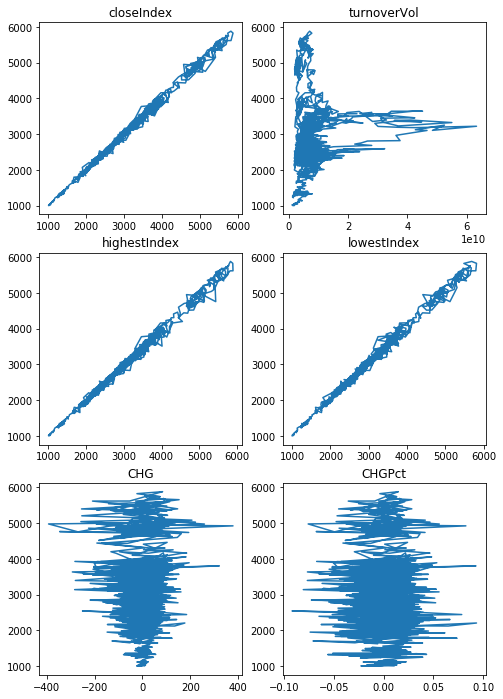

In [5]:
#画出因变量与多个自变量的折线图
f, ax = plt.subplots(ncols=2, nrows=3, figsize=(8, 12))
X = np.arange(0.01, 20, 0.01)
ax[0, 0].plot(df_new['closeIndex'], df_new['preCloseIndex'])
ax[0, 0].set_title("closeIndex")
ax[0, 1].plot(df_new['turnoverVol'], df_new['preCloseIndex'])
ax[0, 1].set_title("turnoverVol")
ax[1, 0].plot(df_new['highestIndex'], df_new['preCloseIndex'])
ax[1, 0].set_title("highestIndex")
ax[1, 1].plot(df_new['lowestIndex'], df_new['preCloseIndex'])
ax[1, 1].set_title("lowestIndex")
ax[2, 0].plot(df_new['CHG'], df_new['preCloseIndex'])
ax[2, 0].set_title("CHG")
ax[2, 1].plot(df_new['CHGPct'], df_new['preCloseIndex'])
ax[2, 1].set_title("CHGPct")

---
<a id="implementation"></a>
## Ⅲ. 实现


### 1.数据预处理
    本项目使用包前一个工作日的收盘指数，前一个工作日最大指数，前一个工作日最小指数，前一个工作日交易量，前一个工作日涨跌价格和前一个工作日涨跌幅度作为特征变量。由于通过panda.info（）观察数据中没有空数据所以不用做空数据的处理。


### 2.执行过程
    使用 df_new 创建一个 training 数据集与一个 test 数据集，其中25％的数据在 test 数据集中。无序状态设为1。将结果存储在 X_train, X_test, y_train, y_test 中。增加截距，用所有的特征变量来拟合线性模型


### 3.完善
    由于是多元线性回归，所以得考虑特征向量的多重共线性，画散点图观察多重共线性，发现每日最大指数和每日最小指数有相关性，涨跌价格和涨跌幅度有相关性。计算VIF（方差膨胀因子）,观察有相关性的特征变量的VIF，如果大于10，去掉小的那个特征变量，用剩余的特征变量拟合一个新的线性模型。


In [6]:
# * 数据预处理的程序，对数据的清洗、处理、分割等
#使用 df_new 创建一个 training 数据集与一个 test 数据集，其中25％的数据在 test 数据集中。
#无序状态设为1。将结果存储在 X_train, X_test, y_train, y_test 中。
X = None
y = None
X = df_new[['closeIndex', 'highestIndex', 'lowestIndex', 'turnoverVol', 'CHG', 'CHGPct']]
y = df_new['preCloseIndex']
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
# * 增加截距，用所有的特征变量来拟合线性模型
X_train['intercept'] = 1
lm = sm.OLS(y_train, X_train)
results = lm.fit()
results.summary()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          preCloseIndex   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 6.369e+04
Date:                Sun, 11 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:46:46   Log-Likelihood:                -9002.0
No. Observations:                1639   AIC:                         1.802e+04
Df Residuals:                    1632   BIC:                         1.806e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
closeIndex       0.8892      0.102      8.750      0.000       0.690       1.088
highestIndex     0.2091      0.070      2.972      0.003       0.071       0.347
lowestIndex     -0.1068      0.057     -1.857      0.064      -0.220       0.006
turnoverVol   6.235e-10   2.76e-10      2.257      0.024    8.17e-11    1.17e-09
CHG              0.2449      0.099      2.477      0.013       0.051       0.439
CHGPct        -412.7578    262.568     -1.572      0.116    -927.763     102.247
intercept       10.4879      5.014      2.092      0.037       0.654      20.322
==============================================================================
Omnibus:                      300.351   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2426.541
Skew:                          -0.619   Prob(JB):                         0.00
Kurtosis:                       8.831   Cond. No.                     1.61e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

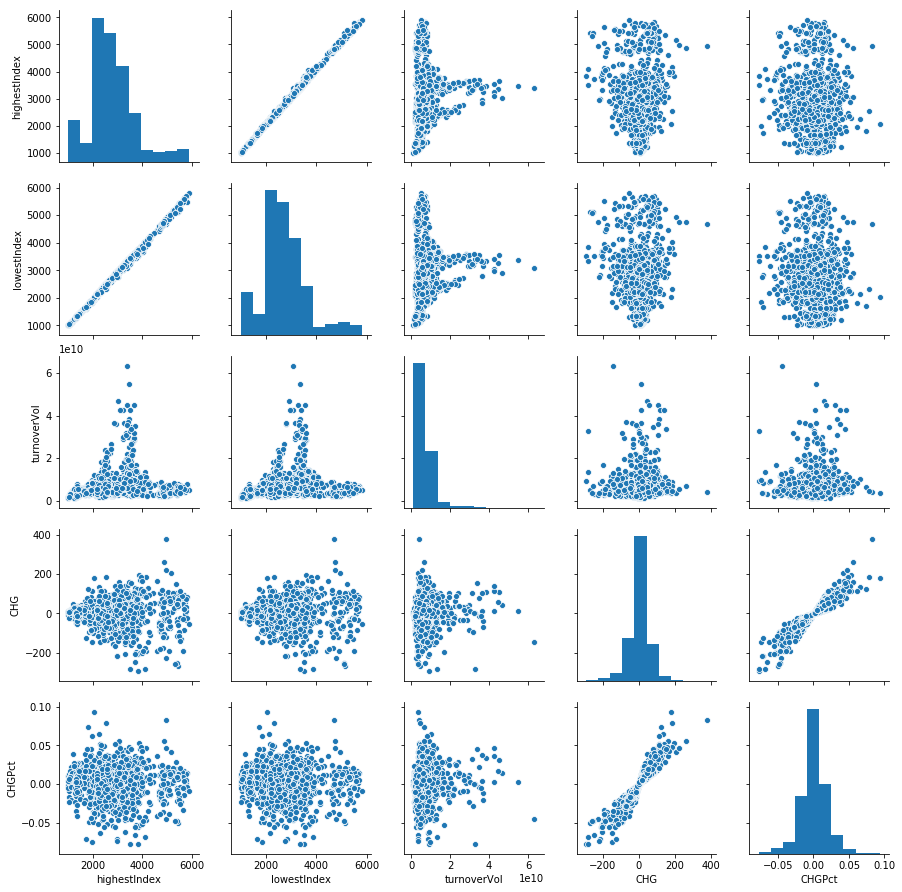

In [7]:
# * 模型的进一步优化
# * 画散点图观察多重共线性
sb.pairplot(X_train[['highestIndex', 'lowestIndex', 'turnoverVol', 'CHG', 'CHGPct']])

In [8]:
#通过 highestIndex 和 lowestIndex 的VIF重新选择模型
#增加截距
df_new['intercept'] = 1
y, X = dmatrices('preCloseIndex ~  highestIndex + lowestIndex + turnoverVol + CHG + CHGPct', df_new, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,12.0,Intercept
1,534.1,highestIndex
2,533.3,lowestIndex
3,1.1,turnoverVol
4,10.9,CHG
5,10.7,CHGPct


In [9]:
#使用筛选的特征向量拟合线性回归模型
lm = sm.OLS(y_train, X_train[['closeIndex', 'highestIndex', 'turnoverVol', 'CHG']])
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          preCloseIndex   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.013e+06
Date:                Sun, 11 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:46:50   Log-Likelihood:                -9006.3
No. Observations:                1639   AIC:                         1.802e+04
Df Residuals:                    1635   BIC:                         1.804e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
closeIndex       0.7878      0.067     11.752      0.000       0.656       0.919
highestIndex     0.2081      0.066      3.133      0.002       0.078       0.338
turnoverVol   7.457e-10   2.67e-10      2.797      0.005    2.23e-10    1.27e-09
CHG              0.1575      0.042      3.716      0.000       0.074       0.241
==============================================================================
Omnibus:                      323.750   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2707.112
Skew:                          -0.679   Prob(JB):                         0.00
Kurtosis:                       9.148   Cond. No.                     6.14e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
<a id="result"></a>
## IV. 结果


### 模型的评价与验证

    通过使用测试集来进行交叉验证，使用测试集验证后的r平方接近于1，说明这个模型是个不错的模型，

In [10]:
#模型评估：用r平方来评价模型的好坏
lm = LinearRegression()
lm.fit(X_train[['closeIndex', 'highestIndex', 'turnoverVol', 'CHG']], y_train)
lm.score(X_test[['closeIndex', 'highestIndex', 'turnoverVol', 'CHG']], y_test)

0.9961300448070997

In [11]:
#模型评估：用MSE来评价模型的好坏
y_pres = lm.predict(X_test[['closeIndex', 'highestIndex', 'turnoverVol', 'CHG']])
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_test, y_pres))


MSE: 3022.0260501025464


---
<a id="conclusion"></a>
## V. 项目结论



### 结果可视化


### 对项目的思考
    因为不知道如何用statsmodels验证测试集，所以使用了LinearRegression（）来验证测试集。但是同样的模型用statsmodels.OLS得到的R平方为1，而用LinearRegression（）得到的R平方为0.996，结果的可是化不知道如何展示。



### 需要作出的改进
    通过前一个工作日预测下一个工作日的收盘价格可能不太准确，可以通过前5个或者更多的工作日来预测下一个工作日的收盘价格。

